In [2]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
f = pyedflib.EdfReader(r"D:\BaiduNetdiskDownload\Litton_Christopher_0016.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)
print(type(sigbufs))
record=np.array(sigbufs)

<class 'numpy.ndarray'>


In [52]:
f.file_duration,f.file_info(),f.getNSamples()[0],f.getSampleFrequencies()[0]

file name: D:\BaiduNetdiskDownload\0001.edf
signals in file: 191


(720, None, 720000, 1000)

In [54]:
f.file_duration,f.file_info(),f.getNSamples()[0],f.getSampleFrequencies()[0]

file name: D:\BaiduNetdiskDownload\Litton_Christopher_0016.edf
signals in file: 193


(809, None, 809118, 1000)

In [36]:
f.getFileDuration(),len(record),len(record[1]),f.getStartdatetime(),f.getSampleFrequencies()[0]

(1322, 129, 1322090, datetime.datetime(2016, 3, 24, 23, 47, 59), 999)

In [37]:
len(record[1])//f.getFileDuration()

1000

In [20]:
f.getDigitalMaximum()

array([1.0000e+00, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04,
       3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e+04, 3.2767e

In [21]:
f.getDigitalMinimum()

array([     0., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -32768., -32768., -32768., -32768., -32768., -32768.,
       -32768., -327

In [4]:
def Q_P(x,y,bins):
    '''
    x,y 代表两个信号
    bins代表区间
    '''
    sxy=pd.DataFrame({'x':x,'y':y})
    sxy=sxy.sort_values(by='x')
    sxy.index=range(len(sxy))
    sxy['bins']=pd.cut(sxy['x'],bins,labels=range(1,len(bins)))
    Q=[]
    P=[]
    for i in range(len(bins)-1):
        Q.append(sxy[sxy.bins==i+1]['y'].mean())
        P.append((bins[i]+bins[i+1])/2) 
    return Q,P

def sx(i,x,P):
    '''
    i的取值范围是[1,len(P)-1]
    '''
    lp=len(P)
    if(i==1):
        if(x<=P[1]):
            return 1
        else:
            return 0
    if(i==lp-1):
        if x>P[lp-2]:
            return 1
        else:
            return 0
    if P[i-1]<x<P[i]:
        return 1
    else:
        return 0
    
def gx(i,x,Q,P):
    '''
    i的取值范围是[1,len(P)-1]
    '''
    k=(Q[i]-Q[i-1])/(P[i]-P[i-1])
    gx=k*(x-P[i-1])+Q[i-1]
    return gx

def fx(x,Q,P):
    '''
    L: the number of bins
    '''
    L=len(P)
    fx=0
    for i in range(L-1):
        fx+=sx(i+1,x,P)*gx(i+1,x,Q,P)
    return fx   

def h2(y,f):
    my=np.mean(y)
    sst=np.sum((y-my)**2)
    sse=np.sum((y-f)**2)
    h2=1-sse/sst
    return h2

In [88]:
def H2(s1,s2,L):
    bins1=np.linspace(np.min(s1),np.max(s1),L)
    Q1,P1=Q_P(s1,s2,bins1)
    f1=[]
    
    for x in s1:
        f1.append(fx(x,Q1,P1))
    f1=np.array(f1)
    h2s1=h2(s2,f1)
    
    bins2=np.linspace(np.min(s2),np.max(s2),L)
    Q2,P2=Q_P(s2,s1,bins2)
    f2=[]
    for x in s2:
        f2.append(fx(x,Q2,P2))
    f2=np.array(f2)
    h2s2=h2(s1,f2)
    
    H2=np.array([h2s1,h2s2])
    PQ=[[P1,Q1],[P2,Q2]]
    return H2,PQ


def H2_whole(s1,s2,slideWindows,step,L):
    pass

In [14]:
np.linspace(-12,12,11),pct(-12,12)

(array([-12. ,  -9.6,  -7.2,  -4.8,  -2.4,   0. ,   2.4,   4.8,   7.2,
          9.6,  12. ]),
 array([-12,  -9,  -7,  -5,  -2,   0,   1,   4,   6,   8,  11]))

In [6]:
# pct=lambda x,y:np.array(np.percentile(range(x,y,1),[0,10,20,30,40,50,60,70,80,90,100]),dtype=int)
interval=lambda min,max,N:np.linspace(min,max,N)
def fmat(li):
    '''
    li中的元素保留一位有效数字
    '''
    for i in range(len(li)):
        li[i]=round(li[i],1)
    return li

In [93]:
mean56,mean62=np.mean(record[56,1998:3997]),np.mean(record[62,1998:3997])
print(mean56,mean62)
s56_24,s62_24=record[56,1998:3997]-mean56,record[62,1998:3997]-mean62


mean56,mean62=np.mean(s56_24),np.mean(s62_24)
print(mean56,mean62)
s56_24,s62_24=s56_24-mean56,s62_24-mean62

print(np.mean(s56_24),np.mean(s62_24))


-93.95063473926632 -9.146857458282861
-2.092884256205838e-14 2.7298490298337016e-15
1.8198993532224676e-15 0.0


In [94]:
h2_value1,PQ1 = H2(record[56,1998:3997],record[62,1998:3997],7)
h2_value1

array([0.03677702, 0.05411667])

In [96]:
h2_value2,PQ2 = H2(s56_24,s62_24,7)
h2_value2

array([0.03677702, 0.05411667])

In [8]:
mean56_02,mean62_02=np.mean(record[56,0:1998]),np.mean(record[62,0:1998])
s56_02,s62_02=record[56,0:1998]-mean56_02,record[62,0:1998]-mean62_02

''''''
mean56_02,mean62_02=np.mean(s56_02),np.mean(s62_02)
s56_02,s62_02=s56_02-mean56_02,s62_02-mean62_02

np.mean(s56_02),np.mean(s62_02)

(2.731215320639424e-15, -7.283240855038464e-15)

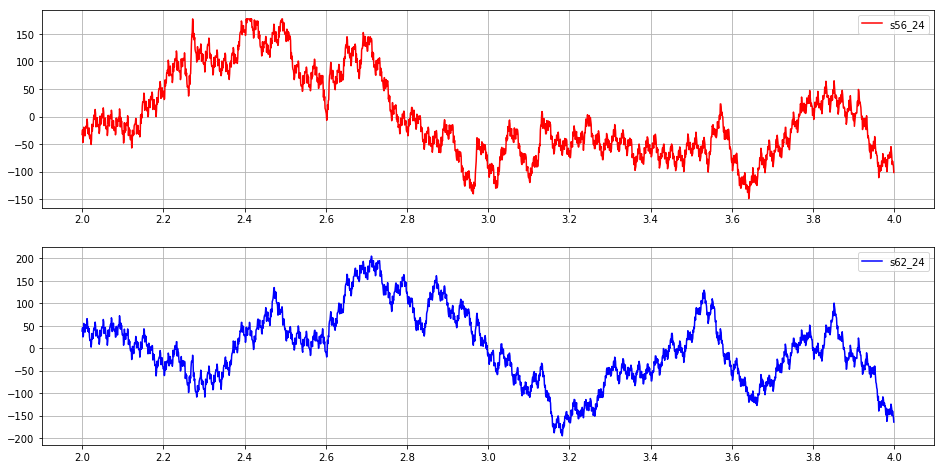

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(s56_24,'r',label="s56_24")
plt.xticks(interval(0,len(s56_24),11),fmat(np.linspace(2,4,11)))
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(s62_24,'b',label="s62_24")
plt.xticks(interval(0,len(s56_24),11),fmat(np.linspace(2,4,11)))
plt.grid()
plt.legend()

plt.show()

In [10]:
def plot_s(s1,s1_name,s2,s2_name,tstart,tstop,L=11):
    plt.figure(figsize=(16,10))
    plt.subplot(211)
    plt.plot(s1,'r',label="s1_name")
    plt.xticks(interval(0,len(s1)-1,L),fmat(np.linspace(tstart,tstop,L)))
    plt.legend()
    plt.grid()

    plt.subplot(212)
    plt.plot(s2,'b',label="s2_name")
    plt.xticks(interval(0,len(s2)-1,L),fmat(np.linspace(tstart,tstop,L)))
    plt.grid()
    plt.legend()

    plt.show()

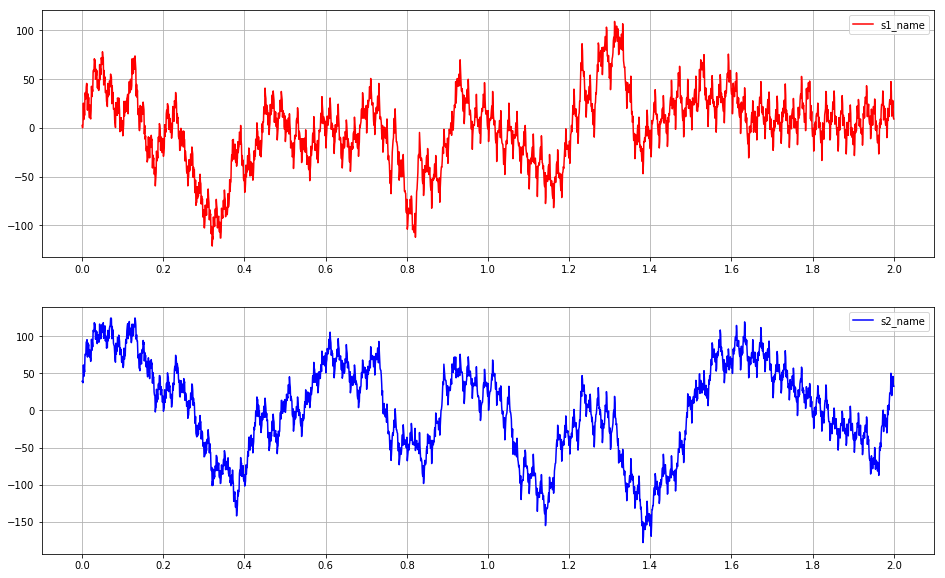

In [64]:
plot_s(s56_02,"s56_02",s62_02,"s62_02",0,2)

In [11]:
h2_value,PQ = H2(s56_24,s62_24,7)
h2_value

array([[0.        , 0.64116103],
       [0.58229931, 0.        ]])

In [76]:
len(s62_24)//4

499

In [12]:
h2_value2,PQ2 = H2(s56_24[len(s56_24)//4:],s62_24[len(s56_24)//4:],7)
h2_value2

array([[0.        , 0.77909621],
       [0.55338383, 0.        ]])

In [67]:
h2_02,PQ_02 = H2(s56_02,s62_02,7)
h2_02

array([[0.        , 0.80979855],
       [0.46420027, 0.        ]])

In [60]:
def scatter_h2(s1,s1_name,s2,s2_name,tstart,tstop,L,PQ):
    plt.figure(figsize=(15,12))
    ax1=plt.subplot(211)
    ax1.scatter(s1,s2,color='b')
    ax1.plot(PQ[0][0],PQ[0][1],'r')
    ax1.set_xlabel(s1_name)
    ax1.set_ylabel(s2_name)
    plt.xticks(interval(np.min(s1),np.max(s2),L),fmat(np.linspace(tstart,tstop,L)))
    plt.grid()

    ax2=plt.subplot(212)
    ax2.scatter(s2,s1,color='b')
    ax2.plot(PQ[1][0],PQ[1][1],'r')
    ax2.set_ylabel(s1_name)
    ax2.set_xlabel(s2_name)
    plt.xticks(interval(np.min(s2),np.max(s2),L),fmat(np.linspace(tstart,tstop,L)))
    plt.grid()

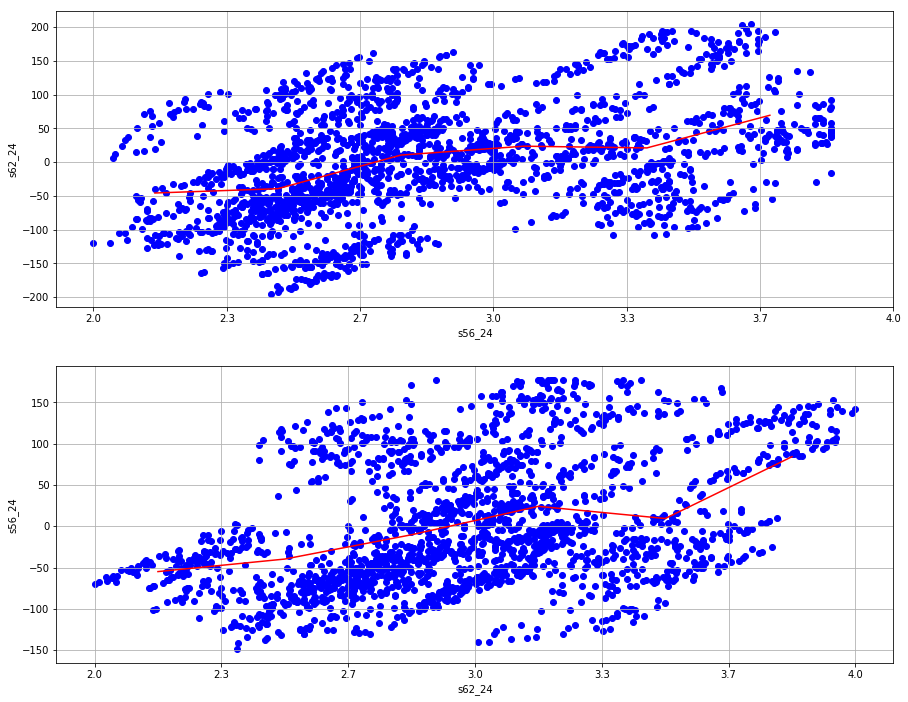

In [61]:
scatter_h2(s56_24,"s56_24",s62_24,"s62_24",2,4,7,PQ)

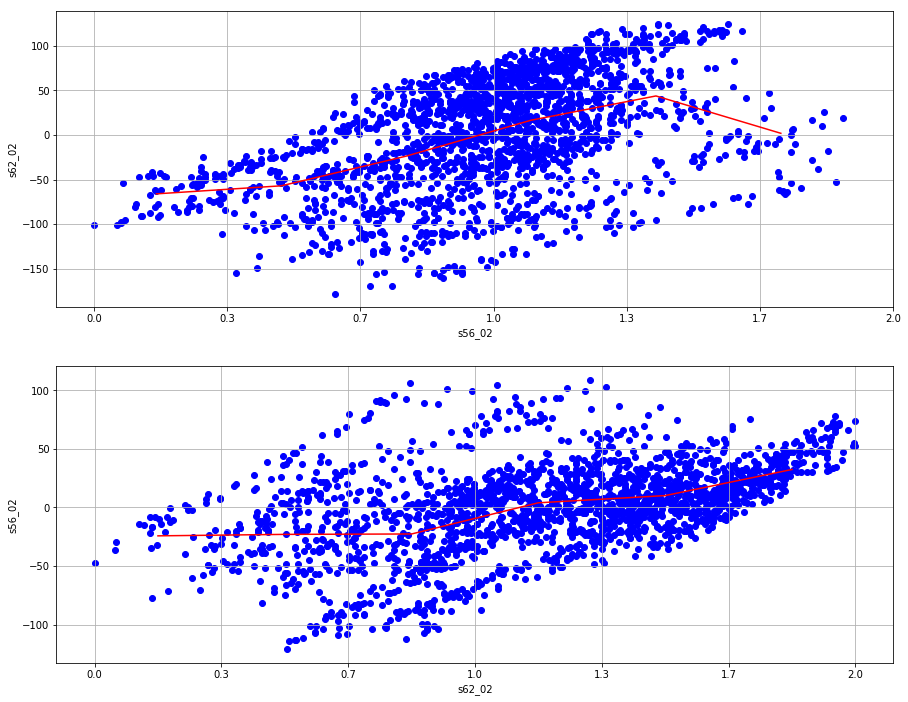

In [72]:
scatter_h2(s56_02,"s56_02",s62_02,"s62_02",0,2,7,PQ_02)

In [47]:
np.corrcoef(s56_24,s62_24)

array([[1.        , 0.40320507],
       [0.40320507, 1.        ]])

In [65]:
np.corrcoef(s56_02,s62_02)

array([[1.        , 0.46942507],
       [0.46942507, 1.        ]])